# Collect Tweets into MongoDB

## Install Python libraries

In [3]:
!pip install pymongo

     |████████████████████████████████| 508 kB 15.4 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [4]:
!pip install pymongo[srv]

     |████████████████████████████████| 188 kB 23.1 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [5]:
!pip install dnspython

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [6]:
!pip install twitter

     |████████████████████████████████| 54 kB 2.5 MB/s  eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [7]:
!pip install tweepy

     |████████████████████████████████| 147 kB 22.8 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


## Import Python libraries

In [8]:
import pymongo
from pymongo import MongoClient
import json
import tweepy
import twitter
from pprint import pprint
import configparser
import pandas as pd

## Load the Authorization Info

In [9]:
config = configparser.ConfigParser()
config.read('config.ini')

CONSUMER_KEY      = config['mytwitter']['api_key']
CONSUMER_SECRET   = config['mytwitter']['api_secrete']
OAUTH_TOKEN       = config['mytwitter']['access_token']
OATH_TOKEN_SECRET = config['mytwitter']['access_secrete']

mongod_connect = config['mymongodb']['connection']

## Connect to the MongoDB Cluster

In [10]:
client = MongoClient(mongod_connect)
db = client.gp8 # use or create a database named demo
tweet_collection = db.lab9 #use or create a collection named tweet_collection
tweet_collection.create_index([("id", pymongo.ASCENDING)],unique = True) # make sure the collected tweets are unique

'id_1'

## Use the Streaming API to Collect Tweets

In [14]:
stream_auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
stream_auth.set_access_token(OAUTH_TOKEN, OATH_TOKEN_SECRET)

strem_api = tweepy.API(stream_auth)

In [15]:
track = ['covid19'] # define the keywords, tweets contain election

#locations = [-78.9326449,38.4150904,-78.8816972,38.4450731] #defin the location, in Harrisonburg, VA

In [16]:
class MyStreamListener(tweepy.StreamListener):
    def on_status(self, status):
        print (status.id_str)
        try:
            tweet_collection.insert_one(status._json)
        except:
            pass
  
    def on_error(self, status_code):
        if status_code == 420:
            #returning False in on_data disconnects the stream
            return False
myStreamListener = MyStreamListener()
myStream = tweepy.Stream(auth = strem_api.auth, listener=myStreamListener)
myStream.filter(track=track)#  (locations = locations)   #Use either track or locations

1326342438856749056
1326342438710087680
1326342439867723777
1326342439943229441
1326342440408801281
1326342440639459329
1326342440974864385
1326342441537040384
1326342442271076353
1326342442300416001
1326342442426097664
1326342443097350146
1326342443206279168
1326342443462176768
1326342443814572033
1326342443361464322
1326342444414357504
1326342444489662464
1326342445769125888
1326342447069163520
1326342448767881217
1326342451016175616
1326342451322302464
1326342452547117056
1326342452878438400
1326342452857462784
1326342453297897479
1326342455541854213
1326342455638241280
1326342456191840256
1326342459169910784
1326342459547389954
1326342459044061184
1326342461589950476
1326342462542024704
1326342462491779072
1326342462865092608
1326342464794370049
1326342465796837377
1326342468120444928
1326342469152288769
1326342469139779588
1326342470419017728
1326342470943207424
1326342470888730626
1326342471090106368
1326342470976745472
1326342471664721920
1326342472495230976
1326342471949844480


KeyboardInterrupt: 

## Use the REST API to Collect Tweets

In [17]:
rest_auth = twitter.oauth.OAuth(OAUTH_TOKEN,OATH_TOKEN_SECRET,CONSUMER_KEY,CONSUMER_SECRET)
rest_api = twitter.Twitter(auth=rest_auth)

In [18]:
count = 100 #number of returned tweets, default and max is 100
#geocode = "38.4392897,-78.9412224,50mi"  # defin the location, in Harrisonburg, VA
q = "covid19"                               #define the keywords, tweets contain election

In [19]:
search_results = rest_api.search.tweets( count=count,q=q) #you can use both q and geocode
statuses = search_results["statuses"]
since_id_new = statuses[-1]['id']
for statuse in statuses:
    try:
        tweet_collection.insert_one(statuse)
        pprint(statuse['created_at'])# print the date of the collected tweets
    except:
        pass

'Wed Nov 11 02:08:23 +0000 2020'
'Wed Nov 11 02:08:23 +0000 2020'
'Wed Nov 11 02:08:23 +0000 2020'
'Wed Nov 11 02:08:23 +0000 2020'
'Wed Nov 11 02:08:21 +0000 2020'
'Wed Nov 11 02:08:21 +0000 2020'
'Wed Nov 11 02:08:21 +0000 2020'
'Wed Nov 11 02:08:21 +0000 2020'
'Wed Nov 11 02:08:21 +0000 2020'
'Wed Nov 11 02:08:20 +0000 2020'
'Wed Nov 11 02:08:20 +0000 2020'
'Wed Nov 11 02:08:20 +0000 2020'
'Wed Nov 11 02:08:19 +0000 2020'
'Wed Nov 11 02:08:19 +0000 2020'
'Wed Nov 11 02:08:19 +0000 2020'
'Wed Nov 11 02:08:19 +0000 2020'
'Wed Nov 11 02:08:18 +0000 2020'
'Wed Nov 11 02:08:17 +0000 2020'
'Wed Nov 11 02:08:17 +0000 2020'
'Wed Nov 11 02:08:16 +0000 2020'
'Wed Nov 11 02:08:16 +0000 2020'
'Wed Nov 11 02:08:15 +0000 2020'
'Wed Nov 11 02:08:15 +0000 2020'
'Wed Nov 11 02:08:14 +0000 2020'
'Wed Nov 11 02:08:13 +0000 2020'
'Wed Nov 11 02:08:13 +0000 2020'
'Wed Nov 11 02:08:13 +0000 2020'
'Wed Nov 11 02:08:12 +0000 2020'
'Wed Nov 11 02:08:11 +0000 2020'
'Wed Nov 11 02:08:11 +0000 2020'
'Wed Nov 1

In [21]:
since_id_old = 0
while(since_id_new != since_id_old):
    since_id_old = since_id_new
    search_results = rest_api.search.tweets( count=count,q=q, max_id= since_id_new)
    statuses = search_results["statuses"]
    since_id_new = statuses[-1]['id']
    for statuse in statuses:
        try:
            tweet_collection.insert_one(statuse)
            pprint(statuse['created_at']) # print the date of the collected tweets
        except:
            pass

'Wed Nov 11 02:00:01 +0000 2020'
'Wed Nov 11 02:00:01 +0000 2020'
'Wed Nov 11 02:00:01 +0000 2020'
'Wed Nov 11 02:00:01 +0000 2020'
'Wed Nov 11 02:00:00 +0000 2020'
'Wed Nov 11 02:00:00 +0000 2020'
'Wed Nov 11 02:00:00 +0000 2020'
'Wed Nov 11 02:00:00 +0000 2020'
'Wed Nov 11 02:00:00 +0000 2020'
'Wed Nov 11 02:00:00 +0000 2020'
'Wed Nov 11 02:00:00 +0000 2020'
'Wed Nov 11 02:00:00 +0000 2020'
'Wed Nov 11 02:00:00 +0000 2020'
'Wed Nov 11 02:00:00 +0000 2020'
'Wed Nov 11 02:00:00 +0000 2020'
'Wed Nov 11 02:00:00 +0000 2020'
'Wed Nov 11 02:00:00 +0000 2020'
'Wed Nov 11 02:00:00 +0000 2020'
'Wed Nov 11 02:00:00 +0000 2020'
'Wed Nov 11 02:00:00 +0000 2020'
'Wed Nov 11 02:00:00 +0000 2020'
'Wed Nov 11 02:00:00 +0000 2020'
'Wed Nov 11 02:00:00 +0000 2020'
'Wed Nov 11 02:00:00 +0000 2020'
'Wed Nov 11 02:00:00 +0000 2020'
'Wed Nov 11 02:00:00 +0000 2020'
'Wed Nov 11 02:00:00 +0000 2020'
'Wed Nov 11 02:00:00 +0000 2020'
'Wed Nov 11 02:00:00 +0000 2020'
'Wed Nov 11 02:00:00 +0000 2020'
'Wed Nov 1

KeyboardInterrupt: 

## View the Collected Tweets 

In [22]:
print(tweet_collection.estimated_document_count())# number of tweets collected

user_cursor = tweet_collection.distinct("user.id")
print (len(user_cursor)) # number of unique Twitter users

2284
2016


In [23]:
tweet_collection.create_index([("text", pymongo.TEXT)], name='text_index', default_language='english') # create a text index

'text_index'

In [28]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "election"}}) # return tweets contain vote

In [29]:
for document in tweet_cursor[0:10]: # display the first 10 tweets from the query
    try:
        print ('----')
#         pprint (document) # use pprint to print the entire tweet document
   
        print ('name:', document["user"]["name"]) # user name
        print ('text:', document["text"])         # tweets
    except:
        print ("***error in encoding")
        pass

----
name: Milena Andreone
text: @nytimes After Election Day no more covid19. Incredible!!!!
----
name: Fix It Now Wisconsin
text: @realDonaldTrump Where is the COVID19 relief you promised AFTER THE ELECTION @realDonaldTrump ???

WHY AREN'T YOU W… https://t.co/IDkwf3e32u
----
name: anonymous troll
text: RT @sri9011: #ProudOfElectionCommission for holding impartial Bihar elections and byelections in UP,Gujarat,Haryana,MP,Karnataka, Chattisga…
----
name: Anil Kishan Zutshi
text: RT @sri9011: #ProudOfElectionCommission for holding impartial Bihar elections and byelections in UP,Gujarat,Haryana,MP,Karnataka, Chattisga…
----
name: Lauren Evoy Davis
text: RT @tmprowell: .@GovLarryHogan (R) of MD: "I think most people realize this election is over...it's time to move on." Says he has congratul…
----
name: Diversity is the only hope
text: I thought the GOP promised us #COVID19 would go away after the election? 

Did they lie again? https://t.co/LGNZhtFFnV
----
name: Good Governance 🇮🇳
text: #P

In [33]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "election"}}) # return tweets contain vote

In [34]:
tweet_df = pd.DataFrame(list(tweet_cursor ))
tweet_df[:10] #display the first 10 tweets

,_id,created_at,id,id_str,text,truncated,entities,metadata,source,in_reply_to_status_id,...,retweet_count,favorite_count,favorited,retweeted,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status,possibly_sensitive
0,5fab480460dcd968cb8153f8,Wed Nov 11 02:03:34 +0000 2020,1326344786454978560,1326344786454978560,@nytimes After Election Day no more covid19. I...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",1.326302e+18,...,0,0,False,False,en,NaN,NaN,NaN,NaN,NaN
1,5fab480660dcd968cb8154b8,Wed Nov 11 02:02:36 +0000 2020,1326344545857114112,1326344545857114112,@realDonaldTrump Where is the COVID19 relief y...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",1.326344e+18,...,0,2,False,False,en,NaN,NaN,NaN,NaN,NaN
2,5fab480260dcd968cb81533e,Wed Nov 11 02:04:27 +0000 2020,1326345012410425345,1326345012410425345,RT @sri9011: #ProudOfElectionCommission for ho...,False,{'hashtags': [{'text': 'ProudOfElectionCommiss...,"{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,...,2,0,False,False,en,{'created_at': 'Wed Nov 11 02:03:51 +0000 2020...,NaN,NaN,NaN,NaN
3,5fab47fe60dcd968cb81515a,Wed Nov 11 02:06:47 +0000 2020,1326345597834551296,1326345597834551296,RT @sri9011: #ProudOfElectionCommission for ho...,False,{'hashtags': [{'text': 'ProudOfElectionCommiss...,"{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/#!/download/ipad"" ...",NaN,...,2,0,False,False,en,{'created_at': 'Wed Nov 11 02:03:51 +0000 2020...,NaN,NaN,NaN,NaN
4,5fab47fc60dcd968cb8150c6,Wed Nov 11 02:07:28 +0000 2020,1326345770644205573,1326345770644205573,"RT @tmprowell: .@GovLarryHogan (R) of MD: ""I t...",False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,...,4,0,False,False,en,{'created_at': 'Tue Nov 10 22:36:37 +0000 2020...,NaN,NaN,NaN,NaN
5,5fab479960dcd968cb815041,Wed Nov 11 02:08:11 +0000 2020,1326345952286879750,1326345952286879750,I thought the GOP promised us #COVID19 would g...,False,"{'hashtags': [{'text': 'COVID19', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,0,0,False,False,en,NaN,1.326337e+18,1326337486893641729,{'created_at': 'Wed Nov 11 01:34:33 +0000 2020...,False
6,5fab480460dcd968cb8153ba,Wed Nov 11 02:03:51 +0000 2020,1326344860572377089,1326344860572377089,#ProudOfElectionCommission for holding imparti...,True,{'hashtags': [{'text': 'ProudOfElectionCommiss...,"{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,...,2,6,False,False,en,NaN,NaN,NaN,NaN,NaN
7,5fab480a60dcd968cb815625,Wed Nov 11 02:01:01 +0000 2020,1326344145087160321,1326344145087160321,"Trump during the summer: ""We'll have a vaccine...",True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,0,0,False,False,en,NaN,NaN,NaN,NaN,NaN
8,5fab480060dcd968cb815270,Wed Nov 11 02:05:26 +0000 2020,1326345257747886082,1326345257747886082,"The Election was MADE SO TRANSPARENT, due to t...",False,"{'hashtags': [{'text': 'COVID19', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,0,0,False,False,en,NaN,1.326344e+18,1326343870028926978,{'created_at': 'Wed Nov 11 01:59:55 +0000 2020...,True
9,5fab47fd60dcd968cb81513e,Wed Nov 11 02:06:53 +0000 2020,1326345623965106177,1326345623965106177,RT @blsanthosh: The in this Pan India election...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'e

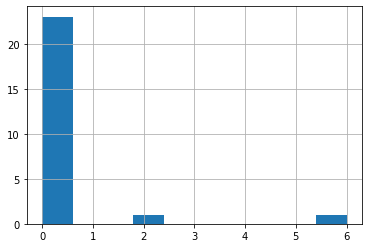

In [35]:
tweet_df["favorite_count"].hist() # create a histogram show the favorite count